In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_excel ("HW_Data_Set.xlsx")
df= data.copy()
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [53]:
na= []
k = list(df.isnull().sum())
for x in k:
    if x > 0:
        na.append(x)
print(na)

[]


In [4]:
df = df.dropna(how="any")
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [5]:
# kategorik değişkenleri görmek istedim
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388


In [6]:
df_categorical["ind_420"].describe()

count     6167
unique     582
top          ?
freq      1041
Name: ind_420, dtype: object

In [7]:
dff= df.copy()
dff.head(2)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198


In [8]:
dff["ind_420"].describe()

count     6167
unique     582
top          ?
freq      1041
Name: ind_420, dtype: object

In [9]:
dff.drop(labels=["ind_420","ind_422"],axis=1,inplace=True)

In [10]:
# one hot encoding ile bir değişkeni numerik hale getirdim
dff_encoded = pd.get_dummies(dff, columns = ["ind_109"], prefix = ["new_"],drop_first=True)
dff_encoded

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,new__RED
0,19,17,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,2.0,-49.6,-54,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753,0
1,24,19,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.8,-55.6,-60,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198,0
2,30,24,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,2.7,-58.4,-60,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805,0
3,37,30,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.9,-61.8,-65,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483,0
4,41,37,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.1,-79.8,-86,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,31,57.142857,28.571429,28.571429,60.010531,32.362582,9.70,9.38,13.66,...,14.7,-28.2,-40,0.270270,0.840000,0.600846,14.673247,-34.536532,-35.867088,1
6163,22,27,50.000000,21.428571,28.571429,60.209998,32.914628,7.65,8.84,11.79,...,14.3,-28.6,-41,0.000000,0.737470,0.527673,14.673750,-34.537716,-35.868318,1
6164,19,22,42.857143,14.285714,28.571429,64.329611,43.550592,8.95,9.06,10.30,...,5.7,-37.2,-49,0.769231,0.632107,0.551759,-14.684566,-34.563173,-35.894755,0
6165,19,19,100.000000,7.142857,92.857143,69.027764,54.130755,13.55,10.36,10.55,...,1.4,-48.9,-61,1.000000,0.733010,0.591584,-14.699280,-34.597806,-35.930723,0


In [11]:
dff_encoded.drop(labels=["50_target","20_target"],axis=1,inplace=True)

In [12]:
dff_encoded.corr()["90_target"].abs().nlargest(10)
# en yüksek korelasyonu 90_target ile gördüğüm için y olarak bunu seçtim

90_target    1.000000
ind_18       0.140877
ind_17       0.129277
ind_412      0.124265
ind_332      0.115002
ind_16       0.108077
ind_324      0.103707
ind_418      0.096903
ind_330      0.093811
ind_15       0.088271
Name: 90_target, dtype: float64

In [13]:
dff_high_corr = dff_encoded.corr()["90_target"].abs().nlargest(10).index

In [14]:
dff_last = dff_encoded[dff_high_corr]
dff_last.head(3)

,90_target,ind_18,ind_17,ind_412,ind_332,ind_16,ind_324,ind_418,ind_330,ind_15
0,36.997753,9.1100,12.060000,0.002371,20.967742,11.73,-0.000062,-54,-0.157039,17.62
1,37.016198,9.2225,11.326667,0.003074,20.800000,12.22,-0.000062,-60,-0.156961,18.16
2,-37.024805,9.3125,10.973333,0.003561,20.634921,12.28,-0.000062,-60,-0.156925,17.86


In [15]:
columns= []

for column in dff_last.columns:
    columns.append(column)
print(columns)
print(type(columns))

['90_target', 'ind_18', 'ind_17', 'ind_412', 'ind_332', 'ind_16', 'ind_324', 'ind_418', 'ind_330', 'ind_15']
<class 'list'>


In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [17]:
# Standardizasyon yaptım
dff_scaled = preprocessing.scale(dff_last)
dff_scaled = pd.DataFrame(data=dff_scaled, columns=columns)
dff_scaled.head()

,90_target,ind_18,ind_17,ind_412,ind_332,ind_16,ind_324,ind_418,ind_330,ind_15
0,1.094311,-0.977360,0.064130,0.379478,0.163974,-0.008731,0.091847,-1.110172,0.021477,1.010514
1,1.094811,-0.935807,-0.099256,0.503689,0.158695,0.089859,0.091847,-1.368019,0.021643,1.103849
2,-0.915067,-0.902565,-0.177979,0.589731,0.153500,0.101931,0.091847,-1.368019,0.021721,1.051996
3,-0.915492,-0.864706,-0.299776,0.731935,0.148386,0.168328,0.091847,-1.582891,0.021862,0.516185
4,-0.917203,-0.688338,-0.081432,0.702224,0.143353,0.498302,0.091847,-2.485355,0.022427,0.025313


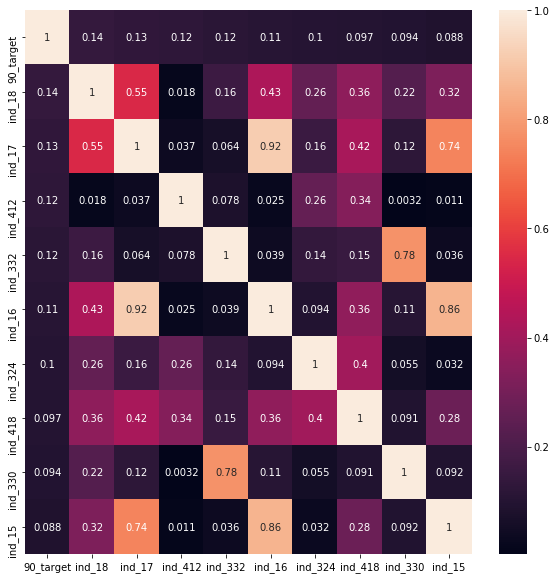

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(dff_scaled.corr().abs(), annot=True);

In [19]:
import statsmodels.formula.api as smf
dff_scaled.columns

Index(['90_target', 'ind_18', 'ind_17', 'ind_412', 'ind_332', 'ind_16',
       'ind_324', 'ind_418', 'ind_330', 'ind_15'],
      dtype='object')

In [20]:
# VIF ile değişkenlerin anlamlı olma durumlarına baktım
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [21]:
vif = calc_vif(dff_scaled)
vif

,variables,VIF
0,90_target,1.052353
1,ind_18,1.645475
2,ind_17,8.777143
3,ind_412,1.241888
4,ind_332,2.644984
5,ind_16,12.327538
6,ind_324,1.285148
7,ind_418,1.611874
8,ind_330,2.651208
9,ind_15,4.057585


In [22]:
# Bağımsız Değişkenler için Normallik Testi
from scipy.stats import shapiro
for column_scaled in dff_scaled:
    stats, p =shapiro(dff_scaled[column_scaled]) 
    print( "Statistic = {}, p-value= {}".format(stats,"%.3f" % p))
    if p < 0.05:
        print("H0 REJECT",column_scaled, "Data is not normally distributed")
    elif p > 0.05:
        print("H0 FAIL TO REJECT.",column_scaled, " Data is normally distributed ")    

Statistic = 0.6609694957733154, p-value= 0.000
H0 REJECT 90_target Data is not normally distributed
Statistic = 0.9522638916969299, p-value= 0.000
H0 REJECT ind_18 Data is not normally distributed
Statistic = 0.962120532989502, p-value= 0.000
H0 REJECT ind_17 Data is not normally distributed
Statistic = 0.984597384929657, p-value= 0.000
H0 REJECT ind_412 Data is not normally distributed
Statistic = 0.5369144678115845, p-value= 0.000
H0 REJECT ind_332 Data is not normally distributed
Statistic = 0.9540035128593445, p-value= 0.000
H0 REJECT ind_16 Data is not normally distributed
Statistic = 0.6002165675163269, p-value= 0.000
H0 REJECT ind_324 Data is not normally distributed
Statistic = 0.8690608739852905, p-value= 0.000
H0 REJECT ind_418 Data is not normally distributed
Statistic = 0.40696197748184204, p-value= 0.000
H0 REJECT ind_330 Data is not normally distributed
Statistic = 0.9279134273529053, p-value= 0.000
H0 REJECT ind_15 Data is not normally distributed


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict

In [24]:
X = dff_scaled.drop(labels=["90_target","ind_16","ind_15","ind_330","ind_324","ind_418"], axis=1)
y = dff_scaled["90_target"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

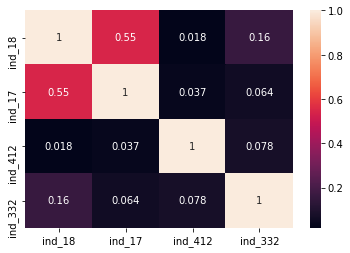

In [25]:
sns.heatmap(X.corr().abs(),annot=True)

In [26]:
# Statsmodels
import statsmodels.api as sm

In [27]:
lm =sm.OLS(y_train,X_train)

In [121]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.052
Model:                            OLS   Adj. R-squared (uncentered):              0.051
Method:                 Least Squares   F-statistic:                              67.93
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                    4.77e-56
Time:                        15:33:53   Log-Likelihood:                         -6869.2
No. Observations:                4933   AIC:                                  1.375e+04
Df Residuals:                    4929   BIC:                                  1.377e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_18         0.0788      0.017      4.746      0.000       0.046       0.111
ind_17         0.0822      0.016      5.013      0.000       0.050       0.114
ind_412        0.1318      0.014      9.388      0.000       0.104       0.159
ind_332        0.1010      0.014      7.097      0.000       0.073       0.129
==============================================================================
Omnibus:                    20695.190   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              648.529
Skew:                           0.162   Prob(JB):                    1.49e-141
Kurtosis:                       1.254   Cond. No.                         1.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train,y_train)

In [30]:
model.intercept_

-0.00033704144487261157

In [31]:
model.coef_

array([0.07875581, 0.08222274, 0.13183094, 0.10099548])

In [32]:
y_predicted = lr.predict(X_test)

In [57]:
# Test Verileri Tahmin ve Hatalar
error_table=pd.DataFrame({"Predicted" : y_predicted ,
                          "Expected" : y_test, 
                          "Error" : y_test - y_predicted ,
                          "ErrorSquare" :(y_test - y_predicted)*(y_test - y_predicted) })
error_table.head(20)

,Predicted,Expected,Error,ErrorSquare
3027,-0.168786,-0.938507,-0.769721,0.592471
410,0.548813,1.106928,0.558115,0.311492
2484,-0.093042,-0.942997,-0.849955,0.722423
5929,-0.174194,-0.883498,-0.709304,0.503112
2827,0.088595,1.123626,1.035031,1.071290
4638,-0.004970,-0.895598,-0.890628,0.793218
1022,0.272585,-0.949614,-1.222200,1.493772
4397,-0.106149,1.078697,1.184847,1.403862
2272,0.013918,-0.937523,-0.951440,0.905239
3194,-0.204451,-0.935069,-0.730618,0.533803


In [64]:
lr.score(X_test,y_test)

0.027476688738211737